I chose a dataset with the stats of every pokemon up until generation 9. I decided I wanted to explore the relationships between the type of a pokemon and its stats and what stats are the most relevent in determining those stats. I start by importing libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import utils

*******There are a few error messages throughout this notebook that are warnings but the code runs as intended*******

Here I am loading the final dataframe from the pervious project and the new dataframe from this project

In [2]:
main = pd.read_csv("pokemondata.csv")

Here I am cleaning up the dataset to get rid of any columns that won't be useful to me. I won't need columns such as the picture of the pokemon and such.

In [3]:
main = main.drop('pic_url', axis = 1)
main = main.drop('pkedex_desc', axis = 1)
main = main.drop('poss_attacks', axis = 1)
main = main.drop('raid_avail', axis = 1)
main.rename(columns = {'hp_range':'HP','cp_range':'CP'}, inplace = True)
#converting the capture rate column into a float
main['capture_rate'] = main['capture_rate'].str.rstrip('%').astype('float') / 100.0

I am focusing on the maximum stats for this project so I am dropping the low end of the stats that have ranges here.

In [4]:
main['CP'] = main['CP'].str[3:]
main['HP'] = main['HP'].str[3:]

In [5]:
main['CP'] = main['CP'].str.replace(',','')

In [6]:
print(main)

     number pokemon_name main_type secondary_type region   category height  \
0         1    Bulbasaur     Grass         Poison  Kanto       Seed  0.7 m   
1         2      Ivysaur     Grass         Poison  Kanto       Seed    1 m   
2         3     Venusaur     Grass         Poison  Kanto       Seed    2 m   
3         4   Charmander      Fire            NaN  Kanto     Lizard  0.6 m   
4         5   Charmeleon      Fire            NaN  Kanto      Flame  1.1 m   
..      ...          ...       ...            ...    ...        ...    ...   
765     867    Runerigus    Ground          Ghost  Galar     Grudge  1.6 m   
766     870      Falinks  Fighting            NaN  Galar  Formation    3 m   
767     888       Zacian     Fairy            NaN  Galar    Warrior  2.8 m   
768     889    Zamazenta  Fighting            NaN  Galar    Warrior  2.9 m   
769     893       Zarude      Dark          Grass  Galar      Rogue  1.8 m   

      weight     pokemon_family  attack  ...  flee_rate  male_p

First, lets learn a little bit about the data and the pokemon as a whole. Here I am creating a total column with the total of the stamina, HP, CP, attack, and defense
stats to get a general idea on how strong a pokemon really is.

In [7]:
main['total'] = main.iloc[:, 9:13].sum(axis=1)

C:\Users\kedri\AppData\Local\Temp\ipykernel_17184\1379925348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main['total'] = main.iloc[:, 9:13].sum(axis=1)


Now we can see how powerful each region is in the pokemon games. I took the average total power of every pokemon in each region and plotted it to get
a visual reference to what each region's power level looks like.

region
Alola      478.941176
Galar      551.307692
Hoenn      453.066667
Johto      462.140000
Kalos      480.527778
Kanto      460.615894
Sinnoh     498.766355
Unknown    513.500000
Unova      482.237179
Name: total, dtype: float64


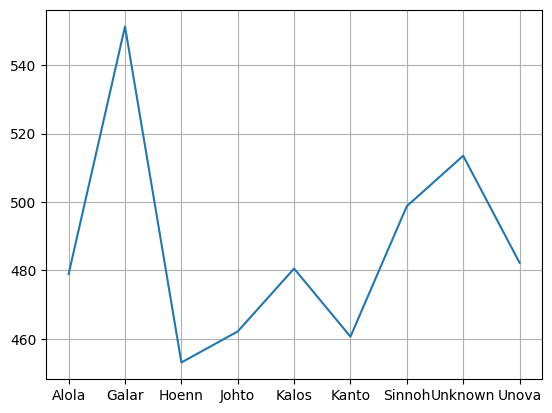

In [8]:
regAverage = main.groupby('region')['total'].mean()
print(regAverage)
plt.plot(regAverage)
plt.grid(True)

Now I take the average of the total stats of each type of pokemon to get a visual on how powerful each type is in relation to each other.

main_type
Bug         415.86
Poison      444.87
Normal      449.29
Grass       458.82
Electric    463.68
Water       468.02
Ghost       475.13
Fire        485.82
Fighting    488.64
Flying      490.67
Dark        491.23
Ground      492.35
Fairy       492.79
Ice         496.67
Rock        503.67
Psychic     503.98
Steel       519.72
Dragon      546.63
Name: total, dtype: float64


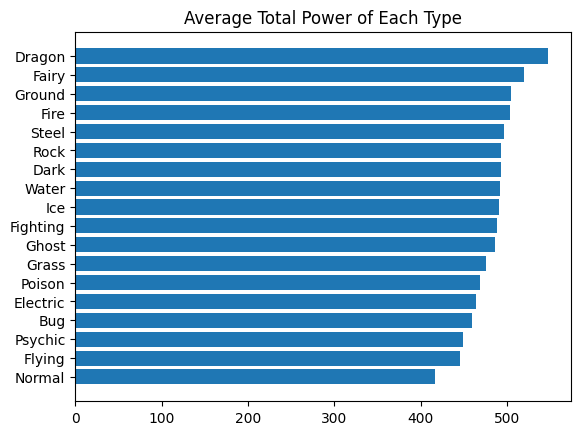

In [9]:
AVG = []
typAverage = main.groupby('main_type')['total'].mean().round(decimals = 2).sort_values(ascending = True)
typ = ['Normal', 'Flying', 'Psychic', 'Bug', 'Electric', 'Poison', 'Grass', 'Ghost', 'Fighting', 'Ice', 'Water','Dark', 'Rock', 'Steel', 'Fire', 'Ground',
        'Fairy', 'Dragon']
for l in typAverage:
    AVG.append(l)
print(typAverage)
plt.barh(typ, AVG)
plt.title('Average Total Power of Each Type')
plt.show()


After seeing this I started to asks questions about what the stats of a pokemon can predict about the pokemon. So here I used a linear regression model to determine
if the main combat stats of a pokemon can predict its capture rate.

In [10]:
features = ['attack', 'defense', 'stamina', 'CP', 'HP']
lr = linear_model.LinearRegression()
#drops any NaN variables
main.dropna(inplace=True)

#checking for any NaN values
print(main.attack.isna().sum())
print(main.defense.isna().sum())
print(main.stamina.isna().sum())
print(main.capture_rate.isna().sum())
print(main.CP.isna().sum())
print(main.HP.isna().sum())

0
0
0
0
0
0


After I split the data up into train and test and fit it to the model, I print out the r2 score and the ols summary. What we can gather from this is that these stats is that they
are almost 100% accurate in predicting the capture rate of a pokemon, shown by the R-squared score. So I started taking out features and discovered that the majority 
of influence comes from the CP stat.

In [11]:
pokemon_ols = sm.ols(formula="capture_rate ~ attack + defense + stamina + CP + HP", data=main).fit()
pokemon_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capture_rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     6.076
Date:                Tue, 06 Dec 2022   Prob (F-statistic):             0.0438
Time:                        18:13:12   Log-Likelihood:                 1007.6
No. Observations:                 287   AIC:                            -1449.
Df Residuals:                       4   BIC:                            -413.5
Df Model:                         282                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7683      0.107      7.205      0.002       0.472       1.064
CP[T.1006]    -0.1494      0.132     -1.129      0.322      -0.517       0.218
CP[T.1009]    -0.2613      0.156     -1.676      0.169      -0.694       0.172
CP[T.1016]    -0.3373      0.208     -1.622      0.180      -0.915       0.240
CP[T.1018]    -0.1083      0.073     -1.483      0.212      -0.311       0.094
CP[T.1020]    -0.1170      0.140     -0.837      0.450      -0.505       0.271
CP[T.1023]    -0.2495      0.131     -1.901      0.130      -0.614       0.115
CP[T.1033]    -0.1956      0.123     -1.590      0.187      -0.537       0.146
CP[T.1037]    -0.1639      0.121     -1.360      0.245      -0.499       0.171
CP[T.1040]    -0.1693      0.127     -1.334      0.253      -0.522       0.183
CP[T.1057]    -0.0830      0.098     -0.843      0.447      -0.356       0.190
CP[T.1062]    -0.0042      0.051     -0.083      0.938      -0.145       0.137
CP[T.1063]    -0.3065      0.137     -2.232      0.089      -0.688       0.075
CP[T.1094]    -0.2155      0.061     -3.549      0.024      -0.384      -0.047
CP[T.1101]     0.2129      0.176      1.207      0.294      -0.277       0.703
CP[T.1102]    -0.5056      0.168     -3.009      0.040      -0.972      -0.039
CP[T.1112]    -0.1021      0.082     -1.245      0.281      -0.330       0.126
CP[T.1115]    -0.1330      0.064     -2.090      0.105      -0.310       0.044
CP[T.1119]    -0.1543      0.088     -1.758      0.154      -0.398       0.089
CP[T.1123]    -0.0435      0.037     -1.172      0.306      -0.146       0.059
CP[T.1135]    -0.2008      0.085     -2.352      0.078      -0.438       0.036
CP[T.1144]    -0.4258      0.162     -2.633      0.058      -0.875       0.023
CP[T.1151]     0.0881      0.054      1.623      0.180      -0.063       0.239
CP[T.1159]    -0.1813      0.084     -2.165      0.096      -0.414       0.051
CP[T.1175]     0.0972      0.086      1.130      0.322      -0.142       0.336
CP[T.1194]    -0.1031      0.056     -1.844      0.139      -0.258       0.052
CP[T.1197]    -0.1765      0.078     -2.273      0.085      -0.392       0.039
CP[T.1200]    -0.0728      0.120     -0.606      0.577      -0.406       0.261
CP[T.1222]    -0.0549      0.032     -1.725      0.160      -0.143       0.033
CP[T.1224]    -0.1328      0.115     -1.156      0.312      -0.452       0.186
CP[T.1225]    -0.4469      0.120     -3.719      0.020      -0.781      -0.113
CP[T.1226]    -0.0058      0.102     -0.057      0.958      -0.289       0.278
CP[T.1227]    -0.2305      0.082     -2.825      0.048      -0.457      -0.004
CP[T.1228]     0.2702      0.060      4.499      0.011       0.103       0.437
CP[T.1229]    -0.5052      0.239     -2.116      0.102      -1.168       0.158
CP[T.1234]    -0.0442      0.076     -0.579      0.593      -0.256       0.167
CP

In [12]:
pokemon_ols = sm.ols(formula="capture_rate ~ attack + defense + stamina + HP", data=main).fit()
pokemon_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capture_rate   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     4.671
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           3.00e-18
Time:                        18:13:13   Log-Likelihood:                 264.99
No. Observations:                 287   AIC:                            -394.0
Df Residuals:                     219   BIC:                            -145.1
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0940      0.227      0.414      0.679      -0.354       0.542
HP[T.106]      0.3280      0.109      3.008      0.003       0.113       0.543
HP[T.109]      0.0945      0.151      0.626      0.532      -0.203       0.392
HP[T.110]      0.2043      0.149      1.368      0.173      -0.090       0.499
HP[T.112]      0.1362      0.126      1.081      0.281      -0.112       0.385
HP[T.113]      0.2754      0.103      2.683      0.008       0.073       0.478
HP[T.117]      0.2516      0.143      1.754      0.081      -0.031       0.534
HP[T.118]      0.1011      0.143      0.708      0.479      -0.180       0.383
HP[T.120]      0.2335      0.093      2.522      0.012       0.051       0.416
HP[T.123]      0.2202      0.115      1.912      0.057      -0.007       0.447
HP[T.124]      0.0365      0.138      0.264      0.792      -0.236       0.309
HP[T.125]      0.2205      0.137      1.607      0.110      -0.050       0.491
HP[T.127]      0.1838      0.086      2.144      0.033       0.015       0.353
HP[T.129]      0.1708      0.135      1.268      0.206      -0.095       0.436
HP[T.131]      0.1771      0.093      1.896      0.059      -0.007       0.361
HP[T.132]      0.2191      0.133      1.648      0.101      -0.043       0.481
HP[T.134]      0.1496      0.074      2.021      0.044       0.004       0.295
HP[T.135]      0.0325      0.131      0.249      0.803      -0.225       0.290
HP[T.136]      0.2002      0.084      2.385      0.018       0.035       0.366
HP[T.138]      0.1951      0.092      2.131      0.034       0.015       0.376
HP[T.139]     -0.0283      0.127     -0.223      0.824      -0.279       0.222
HP[T.140]      0.1629      0.070      2.323      0.021       0.025       0.301
HP[T.142]      0.3550      0.126      2.821      0.005       0.107       0.603
HP[T.143]      0.0882      0.097      0.904      0.367      -0.104       0.280
HP[T.145]      0.0362      0.097      0.374      0.709      -0.155       0.227
HP[T.146]      0.0793      0.123      0.642      0.521      -0.164       0.322
HP[T.147]      0.1180      0.060      1.981      0.049       0.001       0.235
HP[T.150]      0.0804      0.075      1.073      0.285      -0.067       0.228
HP[T.153]      0.0734      0.092      0.800      0.425      -0.108       0.254
HP[T.154]      0.1023      0.054      1.899      0.059      -0.004       0.208
HP[T.156]      0.0696      0.089      0.782      0.435      -0.106       0.245
HP[T.157]     -0.0010      0.117     -0.008      0.993      -0.232       0.230
HP[T.158]      0.0480      0.075      0.636      0.525      -0.101       0.197
HP[T.160]      0.0410      0.116      0.355      0.723      -0.187       0.269
HP[T.162]      0.0921      0.048      1.925      0.056      -0.002       0.186
HP[T.164]      0.1704      0.115      1.485      0.139      -0.056       0.396
HP

To also see how well each stat can predict the others we can look at this heat map. Attack seems to be the best at predicting stamina.

In [13]:
pokemon_ols = sm.ols(formula="capture_rate ~ CP", data=main).fit()
pokemon_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capture_rate   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     4.282
Date:                Tue, 06 Dec 2022   Prob (F-statistic):            0.00115
Time:                        18:13:13   Log-Likelihood:                 763.47
No. Observations:                 287   AIC:                            -982.9
Df Residuals:                      15   BIC:                             12.44
Df Model:                         271                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5000      0.074      6.755      0.000       0.342       0.658
CP[T.1006]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1009]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1016] -1.032e-15      0.105  -9.86e-15      1.000      -0.223       0.223
CP[T.1018]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1020]  6.872e-16      0.105   6.56e-15      1.000      -0.223       0.223
CP[T.1023]    -0.2000      0.105     -1.911      0.075      -0.423       0.023
CP[T.1033]  3.594e-15      0.105   3.43e-14      1.000      -0.223       0.223
CP[T.1037] -2.822e-15      0.105   -2.7e-14      1.000      -0.223       0.223
CP[T.1040]    -0.0500      0.091     -0.552      0.589      -0.243       0.143
CP[T.1057]  2.182e-15      0.105   2.08e-14      1.000      -0.223       0.223
CP[T.1062]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1063]    -0.3000      0.105     -2.866      0.012      -0.523      -0.077
CP[T.1094]    -0.3000      0.105     -2.866      0.012      -0.523      -0.077
CP[T.1101]    -0.3000      0.105     -2.866      0.012      -0.523      -0.077
CP[T.1102]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1112]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1115]    -0.3000      0.105     -2.866      0.012      -0.523      -0.077
CP[T.1119]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1123]    -0.2000      0.105     -1.911      0.075      -0.423       0.023
CP[T.1135]    -0.2000      0.105     -1.911      0.075      -0.423       0.023
CP[T.1144]    -0.3500      0.105     -3.343      0.004      -0.573      -0.127
CP[T.1151] -1.061e-15      0.105  -1.01e-14      1.000      -0.223       0.223
CP[T.1159]    -0.2000      0.105     -1.911      0.075      -0.423       0.023
CP[T.1175] -4.783e-16      0.105  -4.57e-15      1.000      -0.223       0.223
CP[T.1194]    -0.2500      0.105     -2.388      0.031      -0.473      -0.027
CP[T.1197]    -0.1750      0.091     -1.930      0.073      -0.368       0.018
CP[T.1200]  -4.33e-16      0.105  -4.14e-15      1.000      -0.223       0.223
CP[T.1222]    -0.3000      0.105     -2.866      0.012      -0.523      -0.077
CP[T.1224]    -0.2875      0.091     -3.171      0.006      -0.481      -0.094
CP[T.1225]    -0.4000      0.105     -3.821      0.002      -0.623      -0.177
CP[T.1226] -5.222e-18      0.105  -4.99e-17      1.000      -0.223       0.223
CP[T.1227]    -0.2500      0.105     -2.388      0.031      -0.473      -0.027
CP[T.1228]     0.1000      0.105      0.955      0.355      -0.123       0.323
CP[T.1229]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP[T.1234]    -0.1000      0.105     -0.955      0.355      -0.323       0.123
CP

Here I plotted a heat map to show the correlation between attack, defense, and stamina.

C:\Users\kedri\AppData\Local\Temp\ipykernel_17184\1880837540.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main[features].corr(), annot = True)


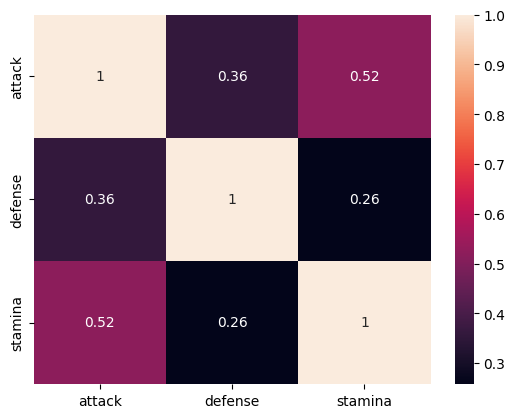

In [14]:
sns.heatmap(main[features].corr(), annot = True)
plt.show()

After seeing the relationship between the stats and the capture rate, I then asked the question what combat stat is the most influential in predicting the capture rate.
To determine this, I created a test train split and used the r2 score to determine what the most influential stat is when determining capture rate. We can now see how the stats relate in realavence to each other.

attack
52.6
defense
41.5
stamina
32.02
CP
60.57
HP
32.08


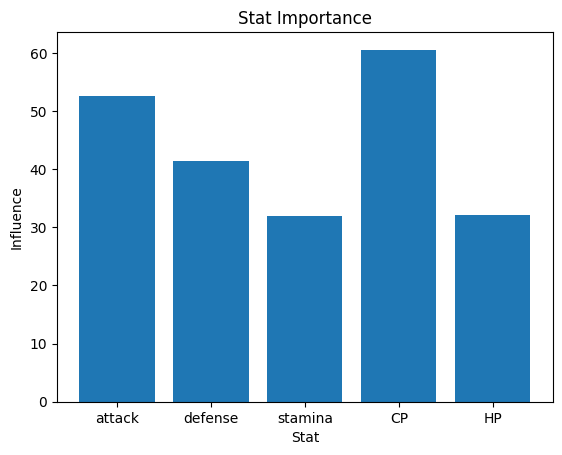

In [15]:
feature_influence = []
for vals in features:
    print(vals)
    X = main[vals].values.reshape(-1,1)
    y = main['capture_rate']
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0, test_size = .2)
    lr.fit(X=XTrain, y=yTrain)
    yPred = lr.predict(XTest)
    print((metrics.r2_score(yTest, yPred)*100).round(decimals = 2))
    feature_influence.append((metrics.r2_score(yTest, yPred)*100).round(decimals = 2))
    
plt.bar(features, feature_influence)
plt.title('Stat Importance')
plt.xlabel('Stat')
plt.ylabel('Influence')
plt.show()

Seeing that CP is the most influential stat in predicting the capture rate, we can assume there is a most influential stat for everything about a pokemon. 
The next test I am going to run is using the same features as before to try and predict the main type of a pokemon.
To do this I am using a decision tree classifier and using the cross validation score to measure the influence.

In [16]:
main.main_type = pd.Categorical(main.main_type)

X = main[features]
y = main['main_type']

clf = DecisionTreeClassifier(max_leaf_nodes = 20)
clf.fit(X, y)

cross_val_score(clf, X, y).mean()


C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.1705989110707804

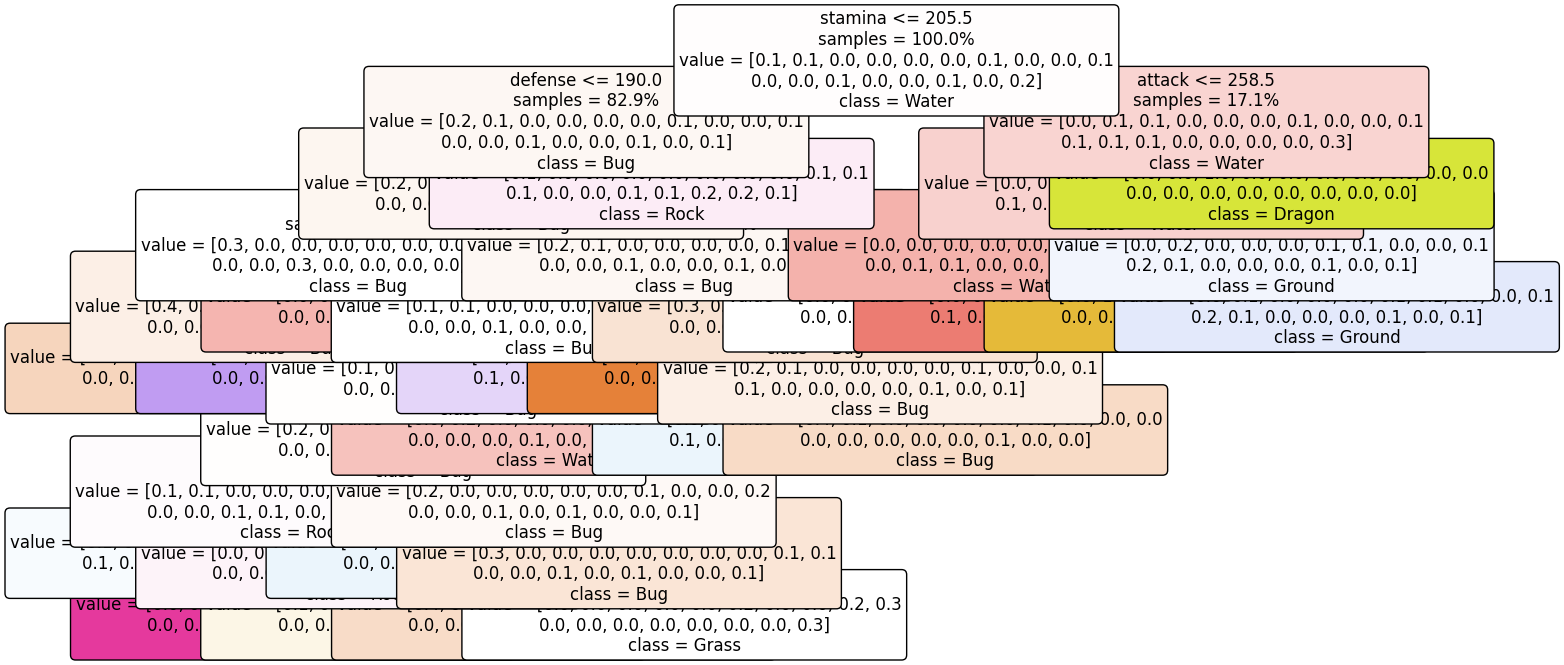

In [17]:
plt.figure(figsize=(16,8))
plot_tree(
    clf, 
    feature_names=features,
    class_names=main['main_type'].dtype.categories,
    impurity=False,
    filled=True,
    proportion=True,
    rounded=True,
    precision=1,
    fontsize=12,
)
plt.show()

Because the mean of the cross validation score is so low, this implies there isn't a strong relation between the features and the pokemon's main type, which is a good thing.

While the relationship isn't as strong as I thought, I still used the decision tree classifier and the cross validation score to find out which is the most influential stat on 
a pokemon's main type. To my surprise, the most influential stat to a pokemon's type turns out to be stamina.

attack
12.55
defense
12.2
stamina
14.29
CP
16.36
HP
14.63


C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.

Text(0, 0.5, 'Influence')

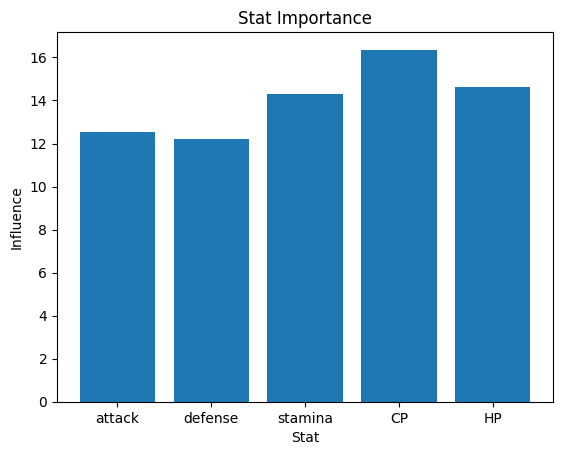

In [18]:
feature_influence2 = []
for items in features:
    print(items)
    X = main[items].values.reshape(-1,1)
    y = main['main_type']
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0, test_size = .2)
    clf.fit(X,y)
    yPred = clf.predict(XTest)
    print((cross_val_score(clf,X,y).mean()*100).round(decimals = 2))
    feature_influence2.append((cross_val_score(clf, X, y).mean()*100).round(decimals = 2))

    
plt.bar(features, feature_influence2)
plt.title('Stat Importance')
plt.xlabel('Stat')
plt.ylabel('Influence')

I also plotted a confusion matrix to visualize what the model does best in predicting.

C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kedri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


14.63


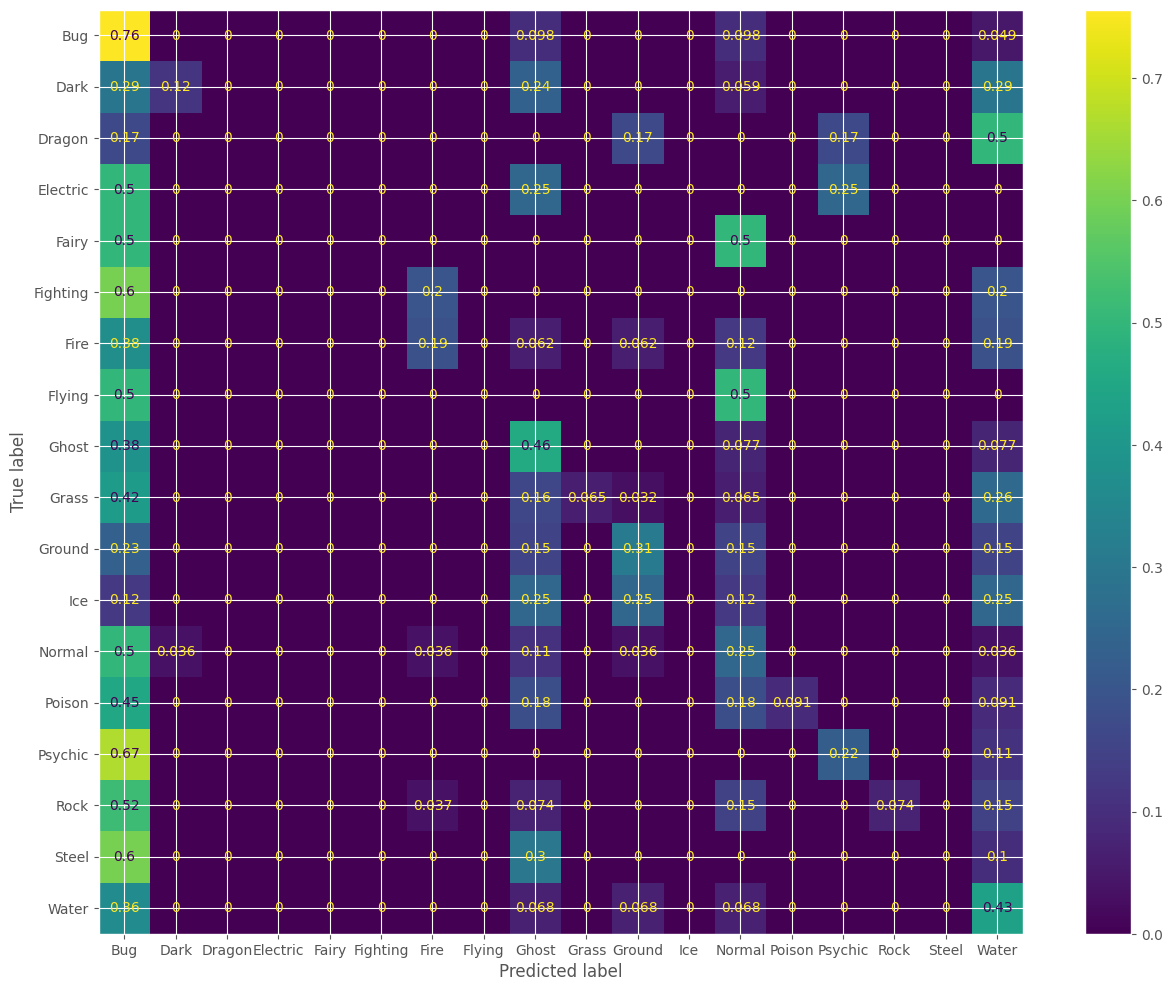

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)
plt.style.use('ggplot')
metrics.plot_confusion_matrix(clf, X, y, normalize='true')


X = main[items].values.reshape(-1,1)
y = main['main_type']
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0, test_size = .2)
clf.fit(X,y)
yPred = clf.predict(XTest)
print((cross_val_score(clf,X,y).mean()*100).round(decimals = 2))
feature_influence2.append((cross_val_score(clf, X, y).mean()*100).round(decimals = 2))

What we can learn from this is that the pokemon games are realativly balanced with their typings and the combat stats of a pokemon have weight in deciding its type.
It being difficult to predict a pokemon's type based on its stats means while playing the game, you don't have to worry about having a specific team type composition
because each type can excel in any stat.
